# CNN pada MNIST HandWritten Digit 

In [43]:
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [61]:
mnist = np.load('mnist.npz')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  


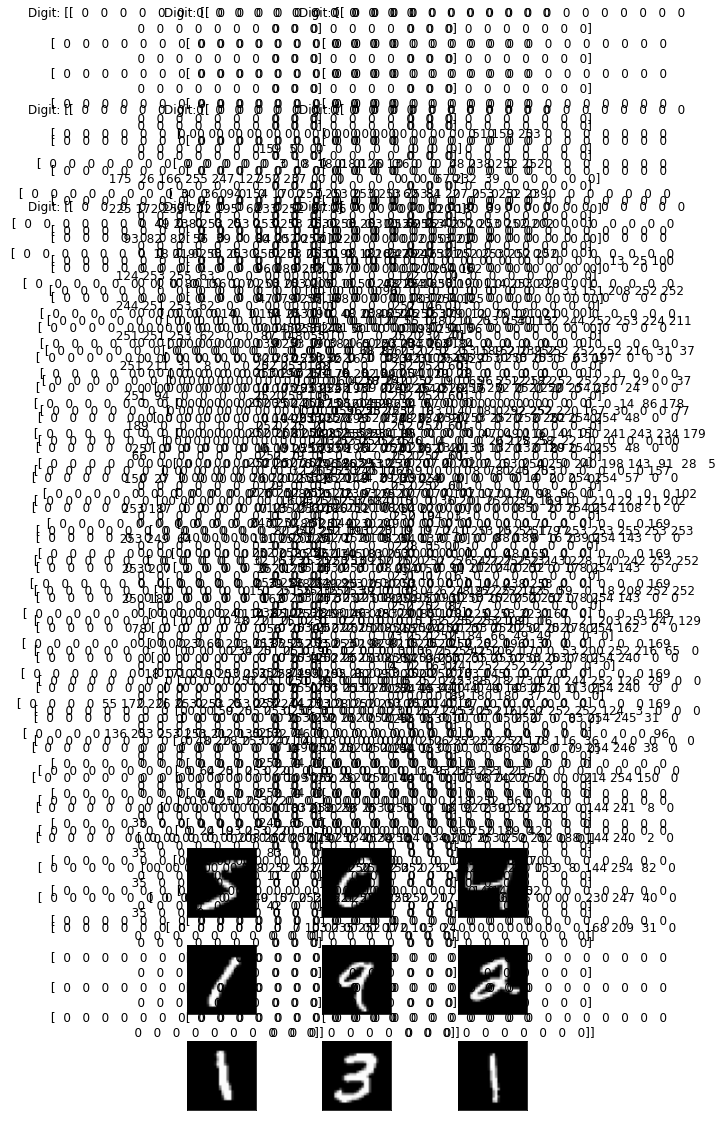

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(mnist['x_train'][i], cmap='gray', interpolation=None)
    plt.title('Digit: {}'.format(mnist['x_train'][i]))
    plt.xticks([])
    plt.yticks([])

In [58]:
img_rows, img_cols = (28,28)
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']

# Channels First
print(k.image_data_format())
if k.image_data_format()=='channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#more reshaping
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape) #x_train shape: (60000, 28, 28, 1)

channels_last
x_train shape: (60000, 28, 28, 1)


In [62]:
y_train = keras.utils.to_categorical(mnist['y_train'])
y_test = keras.utils.to_categorical(mnist['y_test'])

In [63]:
inpx = Input(shape=input_shape)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [64]:
model = Model([input_shape], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy'])

model.fit(x_train, y_train, epoch=12, batch_size=500)

ValueError: Found unexpected instance while processing input tensors for keras functional model. Expecting KerasTensor which is from tf.keras.Input() or output from keras layer call(). Got: 28